In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [112]:
A=np.array([[2,-1,0], [-1,2,-1], [0,-1,2]])
b=np.array([1,2,3])

x_ideal=np.linalg.solve(A,b)

print(f"{A=}")
print(f"{b=}")
print(f"{x_ideal=}")

A=array([[ 2, -1,  0],
       [-1,  2, -1],
       [ 0, -1,  2]])
b=array([1, 2, 3])
x_ideal=array([2.5, 4. , 3.5])


In [113]:
# A needs to be positive definite, and symmetric
def richardson(A, b, tol=1e-6, max_iter=1000):
    x = np.zeros_like(b)
    errors=[]
    for i in range(max_iter):
        r = b - A @ x
        x = x + 0.1*r
        error = np.linalg.norm(r)
        errors.append(error)
        if error < tol:
            break
    return x, errors

In [114]:
x_rich, errors_rich = richardson(A, b)
x_rich

array([2.49999923, 3.99999892, 3.49999923])

Text(0.5, 1.0, 'Errors Richardson')

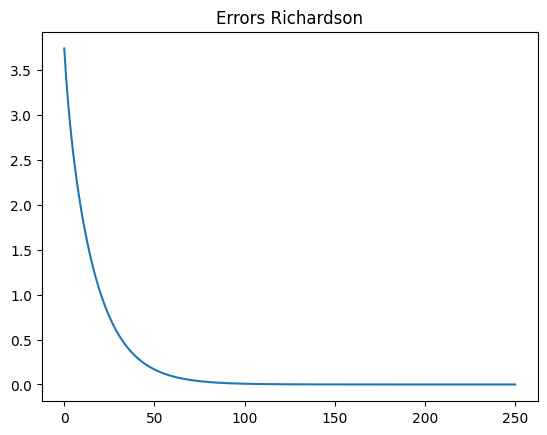

In [115]:
plt.plot(errors_rich)
plt.title("Errors Richardson")

In [116]:
def jacobi(A, b, tol=1e-6, max_iter=1000):
    x = np.zeros_like(b)
    errors=[]
    for i in range(max_iter):
        r = b - A @ x
        x = x + np.diag(1 / np.diag(A)) @ r
        error = np.linalg.norm(r)
        errors.append(error)
        if error < tol:
            break
    return x, errors

In [117]:
x_jac, errors_jac = jacobi(A, b)
x_jac

array([2.49999952, 3.99999928, 3.49999952])

Text(0.5, 1.0, 'Errors Jacobi')

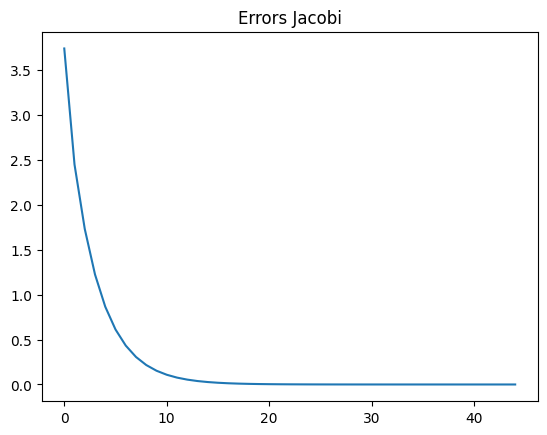

In [118]:
plt.plot(errors_jac)
plt.title("Errors Jacobi")

In [119]:
def gauss_seidel(A, b, tol=1e-6, max_iter=1000):
    x = np.zeros_like(b)
    errors=[]
    for i in range(max_iter):
        r = b - A @ x
        x = x + np.diag(1 / np.diag(A)) @ r
        error = np.linalg.norm(r)
        errors.append(error)
        if error < tol:
            break

    return x, errors

In [120]:
x_gs, errors_gs = gauss_seidel(A, b)
x_gs

array([2.49999952, 3.99999928, 3.49999952])

Text(0.5, 1.0, 'Errors Gauss-Seidel')

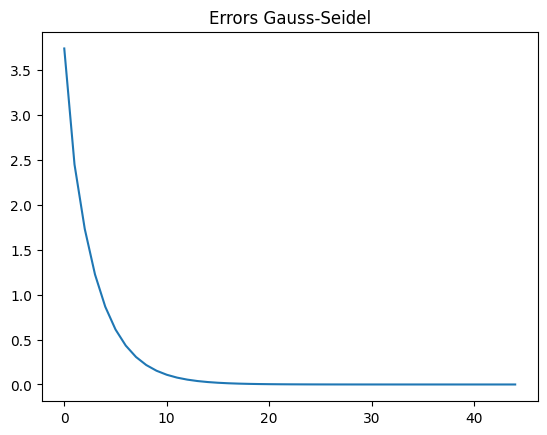

In [121]:
plt.plot(errors_gs)
plt.title("Errors Gauss-Seidel")

In [125]:
def steepest_descent(A, b, tol=1e-6, max_iter=1000):
    x = np.zeros_like(b)
    r = b - A @ x
    errors=[]
    for i in range(max_iter):
        alpha = (r.T @ r) / (r.T @ A @ r)
        x = x + alpha * r
        r = r-alpha*A @ r
        error = np.linalg.norm(r)
        errors.append(error)
        if error < tol:
            break
    return x, errors

In [126]:
x_sd, errors_sd = steepest_descent(A, b)
x_sd

array([2.49999962, 3.99999923, 3.49999962])

Text(0.5, 1.0, 'Errors Steepest Descent')

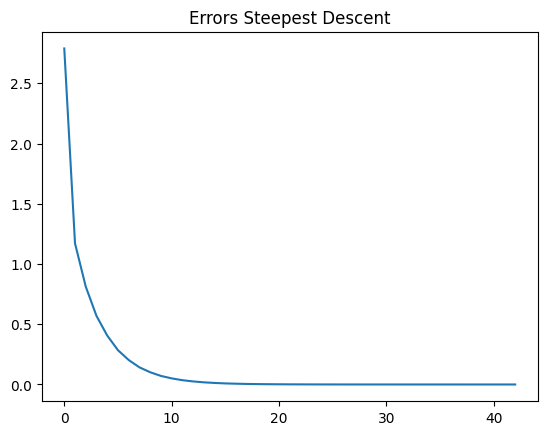

In [127]:
plt.plot(errors_sd)
plt.title("Errors Steepest Descent")

In [135]:
def conjugate_direction(A, b, tol=1e-6, max_iter=1000):
    x = np.zeros_like(b)
    r = b - A @ x
    d = r
    errors=[]
    for i in range(max_iter):
        alpha = (r.T @ r) / (d.T @ A @ d)
        x = x + alpha * d
        r_new = r - alpha * A @ d
        beta = (r_new.T @ r_new) / (r.T @ r)
        d = r_new + beta * d
        r = r_new
        error = np.linalg.norm(r)
        errors.append(error)
        if error < tol:
            break
    return x, errors

In [136]:
x_cd, errors_cd = conjugate_direction(A, b)
x_cd

array([2.5, 4. , 3.5])

Text(0.5, 1.0, 'Errors Conjugate Direction')

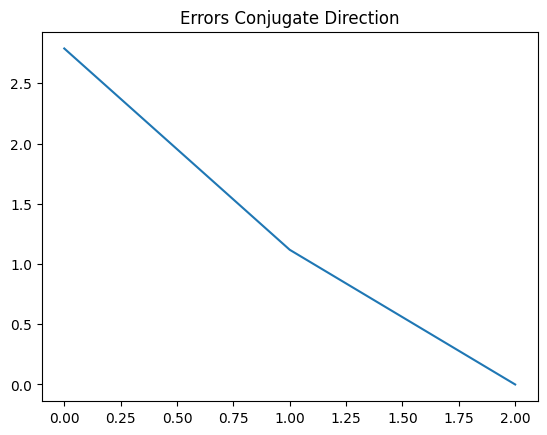

In [137]:
plt.plot(errors_cd)
plt.title("Errors Conjugate Direction")

Text(0.5, 1.0, 'Errors')

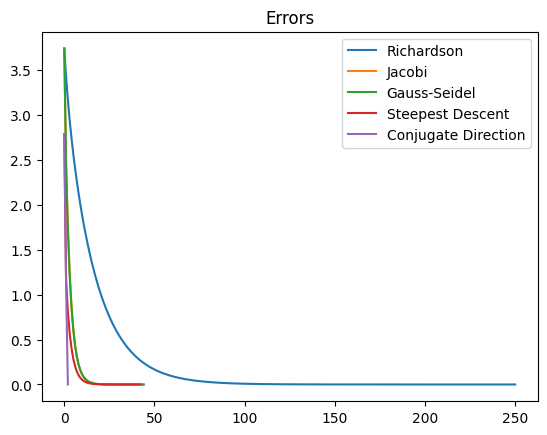

In [139]:
plt.plot(errors_rich, label="Richardson")
plt.plot(errors_jac, label="Jacobi")
plt.plot(errors_gs, label="Gauss-Seidel")
plt.plot(errors_sd, label="Steepest Descent")
plt.plot(errors_cd, label="Conjugate Direction")
plt.legend()
plt.title("Errors")